# 📘Student Performance Analysis Project

# 📑 Table of Contents


----


- Introduction
- Code Explanation
-Dataset Overview     
- CRISP-DM Model Implementation  
  - Business Understanding  
  - Data Understanding  
  - Data Preparation  
  - Modeling  
  - Evaluation  
  - Deployment  
  
- Project Goals    
- Conclusion  
- Future Scope  
- Real life Implementation  
- References

 📖 Introduction

This project analyzes student performance datato understand what influences academic scores. The dataset includes demographics, parental education, lunch types, test prep, and test scores in math, reading, and writing ✍️.

#💻  **Code** **Explanation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

    

*  Essential libraries for data manipulation, visualization, and machine learning

    
* Includes preprocessing tools for data preparationist item learning

   

------


**LOAD** **DATA** **SET**

    

*     Loads the student performance dataset

     
*  Displays first and last 5 rows by default




    

In [ ]:
# Load the dataset
df = pd.read_csv('/content/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# ========== 1. BASIC INSPECTION ==========



*  Displays the first 5 rows of the dataset.



* Helps quickly verify the data format, column names, and initial values.




In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75




*  Displays the last 5 rows of the dataset.


*   Useful for checking if the dataset is complete and consistent till the end.



In [ ]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86




* Returns a tuple (rows, columns), here (1000, 8).


* Confirms the dataset has 1000 records and 8 features.   



In [ ]:
 df.shape

(1000, 8)

* Provides information about data types, non-null counts, and memory usage.

* Useful for identifying missing values and understanding data structure.





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


* Gives summary statistics (count, mean, std, min, max, quartiles) for numerical columns.

* Helps understand the range and distribution of scores.





In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* Provides summary stats (count, unique, top, freq) for categorical columns.

*  Helps identify the most common categories and category count  



In [ ]:
df.describe(include=['object'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


# ========== 2. DATA CLEANING ==========

   * Checks for missing values (none found)

   * Demonstrates handling missing values (though not needed here)

  



In [ ]:
#Finding the missing values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,group B,bachelor's degree,standard,none,0.72,0.662651,0.711111
1,0.0,group C,some college,standard,completed,0.69,0.879518,0.866667
2,0.0,group B,master's degree,standard,none,0.90,0.939759,0.922222
3,1.0,group A,associate's degree,free/reduced,none,0.47,0.481928,0.377778
4,1.0,group C,some college,standard,none,0.76,0.734940,0.722222
...,...,...,...,...,...,...,...,...
995,0.0,group E,master's degree,standard,completed,0.88,0.987952,0.944444
996,1.0,group C,high school,free/reduced,none,0.62,0.457831,0.500000
997,0.0,group C,high school,free/reduced,completed,0.59,0.650602,0.611111
998,0.0,group D,some college,standard,completed,0.68,0.734940,0.744444


   
      

*  Converts categorical variables to numerical values

*  Enables mathematical operations on all features



  



In [ ]:
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['race/ethnicity'] = LabelEncoder().fit_transform(df['race/ethnicity'])
df['parental level of education'] = LabelEncoder().fit_transform(df['parental level of education'])
df['lunch'] = LabelEncoder().fit_transform(df['lunch'])
df['test preparation course'] = LabelEncoder().fit_transform(df['test preparation course'])
df['math score'] = LabelEncoder().fit_transform(df['math score'])
df['reading score'] = LabelEncoder().fit_transform(df['reading score'])
df['writing score'] = LabelEncoder().fit_transform(df['writing score'])

## ======**STANDARDIZATION**====

    
* Transforms data to have mean=0 and variance=1

* Useful for algorithms assuming normal distribution




In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
print(normalized_data)

[[0.         0.25       0.2        ... 0.61971831 0.65789474 0.25      ]
 [0.         0.5        0.8        ... 0.87323944 0.84210526 0.5       ]
 [0.         0.25       0.6        ... 0.94366197 0.90789474 0.25      ]
 ...
 [0.         0.5        0.4        ... 0.6056338  0.53947368 0.5       ]
 [0.         0.75       0.8        ... 0.70422535 0.69736842 0.75      ]
 [0.         0.75       0.8        ... 0.81690141 0.81578947 0.75      ]]


# **====** **NORMALIZATION** **USING** **MINMAXSCALER** ====



   * Scales all features to range [0,1]





   * Preserves relationships while enabling comparison


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
print(standardized_data)

[[-0.96462528 -1.01504393 -0.81264039 ...  0.19394105  0.3921326
  -1.01504393]
 [-0.96462528 -0.15044092  0.82795259 ...  1.44607125  1.323248
  -0.15044092]
 [-0.96462528 -1.01504393  0.28108826 ...  1.79388519  1.65578922
  -1.01504393]
 ...
 [-0.96462528 -0.15044092 -0.26577606 ...  0.12437827 -0.20644159
  -0.15044092]
 [-0.96462528  0.71416208  0.82795259 ...  0.61131778  0.59165733
   0.71416208]
 [-0.96462528  0.71416208  0.82795259 ...  1.16782009  1.19023152
   0.71416208]]


# ====**EXPLORATORY DATA ANALYSIS**====

===**FINDING** **CORRELATION**===



*      Calculates pairwise correlations between variables

    
*  Helps identify relationships between features



In [ ]:
df_corr = df.corr()
df_corr

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,group B
gender,1.000000,-0.001502,0.001913,0.021372,-0.006028,0.166955,-0.246855,-0.304024,-0.001502
race/ethnicity,-0.001502,1.000000,-0.031946,0.046563,-0.017508,0.217160,0.144654,0.165431,1.000000
parental level of education,0.001913,-0.031946,1.000000,0.006320,-0.023968,-0.066525,-0.070682,-0.082873,-0.031946
lunch,0.021372,0.046563,0.006320,1.000000,0.017044,0.350945,0.228564,0.244610,0.046563
test preparation course,-0.006028,-0.017508,-0.023968,0.017044,1.000000,-0.177491,-0.241172,-0.313633,-0.017508
math score,0.166955,0.217160,-0.066525,0.350945,-0.177491,1.000000,0.815400,0.800288,0.217160
reading score,-0.246855,0.144654,-0.070682,0.228564,-0.241172,0.815400,1.000000,0.954039,0.144654
writing score,-0.304024,0.165431,-0.082873,0.244610,-0.313633,0.800288,0.954039,1.000000,0.165431
group B,-0.001502,1.000000,-0.031946,0.046563,-0.017508,0.217160,0.144654,0.165431,1.000000


===**VISUALIZE DISTRIBUTIONS USING HEATMAP**===



*       Visualizes correlation matrix

    
*   Color intensity shows strength of relationships



<Axes: >

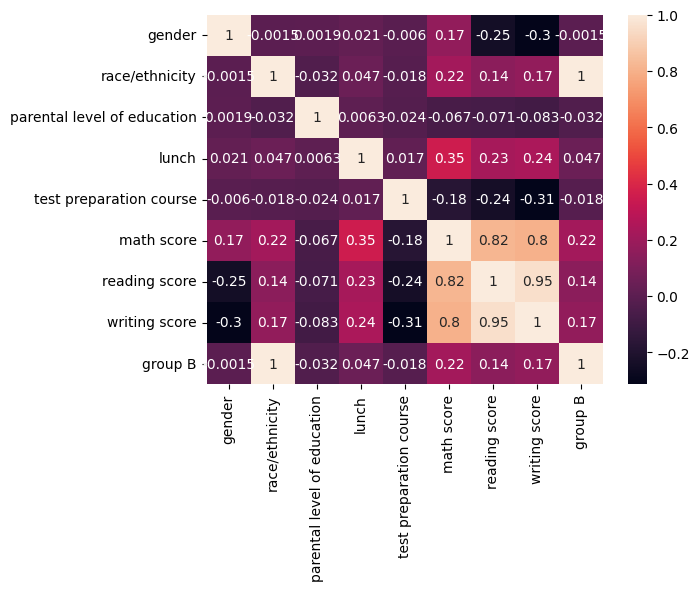

In [ ]:
import seaborn as sns
sns.heatmap(df_corr, annot = True)

===**HISTOGRAM**===



* Helps visualize the distribution of numerical features (math, reading, writing scores).  
*   Identifies skewness, outliers, and central tendency of the data


*   Aids in selecting appropriate data preprocessing or modeling techniques based on distribution.






<Figure size 1200x600 with 0 Axes>

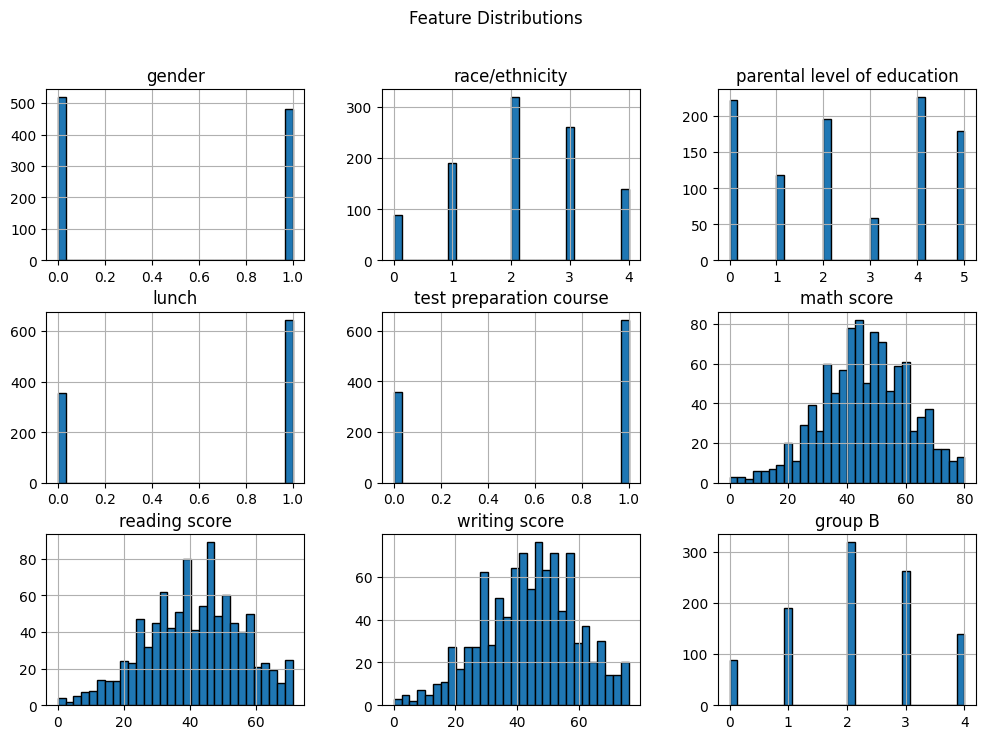

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
df.hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

===**BOX** **PLOT**===





- Shows the **median**, **quartiles (Q1 & Q3)**, and **outliers** for each feature.
- Helps in identifying:
  - **Skewness** in the data
  - **Spread/dispersion** of scores
  - Any **extreme values (outliers)** that may affect analysis or modeling



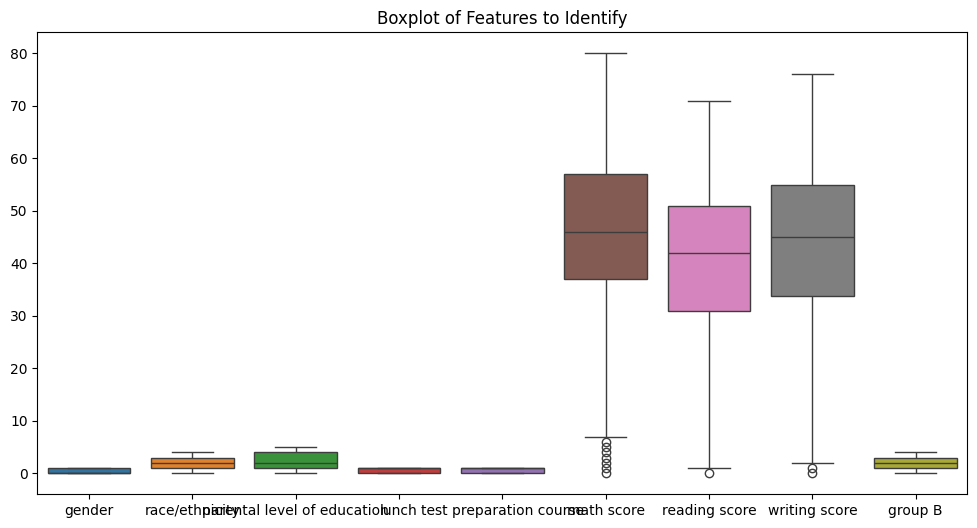

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df)
plt.title("Boxplot of Features to Identify")
plt.show()

===**MODEL** **TRAINING & EVALUATION**===




- Prepares the **feature matrix (`X`)** and **target vector (`y`)** for training a machine learning model.
- Focuses on specific factors that may impact performance (like race, lunch type, test prep, and writing score) to predict a target score.



In [ ]:
X = df.iloc[:, [1, 4, 5, 7]].values
y = df.iloc[:, 8].values

In [ ]:
X

array([[ 1,  1, 52, 50],
       [ 2,  0, 49, 64],
       [ 1,  1, 70, 69],
       ...,
       [ 2,  0, 39, 41],
       [ 3,  0, 48, 53],
       [ 3,  1, 57, 62]])

In [ ]:
y

array([1, 2, 1, 0, 2, 1, 1, 1, 3, 1, 2, 3, 1, 0, 0, 2, 2, 1, 2, 2, 3, 1,
       3, 2, 3, 0, 1, 2, 2, 3, 3, 1, 4, 3, 4, 4, 3, 3, 3, 1, 2, 2, 1, 1,
       4, 1, 0, 2, 3, 2, 4, 4, 2, 3, 2, 2, 4, 3, 3, 2, 4, 0, 0, 2, 3, 1,
       3, 2, 1, 2, 3, 3, 0, 2, 2, 1, 4, 0, 3, 4, 1, 1, 0, 4, 3, 2, 2, 3,
       0, 3, 2, 2, 2, 2, 1, 2, 1, 4, 3, 3, 1, 3, 3, 1, 2, 2, 3, 4, 1, 1,
       3, 2, 0, 3, 4, 2, 1, 3, 3, 2, 2, 1, 2, 3, 4, 1, 1, 3, 3, 0, 3, 2,
       4, 2, 3, 2, 1, 4, 2, 3, 3, 2, 4, 0, 3, 2, 1, 2, 3, 4, 0, 0, 1, 3,
       3, 2, 4, 1, 1, 3, 1, 4, 1, 2, 4, 2, 2, 1, 1, 2, 0, 4, 3, 2, 2, 2,
       1, 2, 1, 3, 2, 2, 4, 3, 2, 2, 4, 3, 1, 2, 4, 3, 1, 3, 2, 3, 2, 4,
       1, 1, 2, 3, 2, 1, 2, 3, 4, 4, 1, 1, 3, 2, 2, 2, 4, 1, 4, 2, 1, 1,
       3, 1, 2, 3, 1, 4, 2, 3, 0, 2, 3, 2, 1, 4, 2, 3, 3, 3, 1, 2, 3, 4,
       3, 4, 3, 2, 4, 1, 1, 2, 0, 3, 1, 3, 3, 4, 2, 2, 1, 2, 2, 2, 2, 4,
       3, 3, 2, 3, 3, 4, 2, 2, 3, 3, 1, 2, 2, 4, 2, 1, 3, 3, 3, 3, 1, 1,
       4, 1, 1, 4, 2, 3, 2, 4, 3, 1, 0, 4, 2, 3, 0,



- Ensures that all features are on the **same scale**, which is important for many machine learning algorithms.
- Prevents features with larger values from dominating the model.
- Especially useful for models that are **distance-based** (like SVM, KNN) or involve **gradient descent** (like logistic/linear regression).



In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

===**SPLITTING DATA INTO TRAIN (80%) AND TEST (20%)**===



- Trains the model on one portion (80%) of the data.
- Tests the model's **accuracy and generalization** on the remaining unseen data (20%).
- Prevents **overfitting** by validating model performance outside the training set.



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 0)

===**LOGISTIC** REGRESSION===



- To **build a predictive model** using training data.
- Once trained, the model can be used to make predictions on new (test) data.



In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()




- To **evaluate the model’s performance** on test data.
- Compares `y_pred` (predicted outputs) with `y_test` (actual outputs) to measure accuracy, error, etc.




In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([3, 2, 2, 3, 2, 2, 2, 2, 4, 3, 2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 3,
       1, 1, 3, 2, 1, 1, 2, 2, 1, 2, 0, 1, 3, 2, 3, 2, 2, 3, 3, 2, 0, 3,
       3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 3, 3, 2, 4, 3, 3, 4, 4, 2, 1, 2,
       3, 2, 1, 0, 3, 3, 3, 1, 4, 3, 3, 3, 2, 1, 2, 3, 4, 1, 4, 3, 3, 1,
       3, 2, 2, 1, 1, 1, 4, 2, 1, 1, 2, 1, 1, 4, 1, 0, 2, 1, 2, 2, 3, 4,
       4, 3, 3, 2, 4, 4, 4, 2, 0, 1, 3, 3, 2, 1, 4, 3, 3, 3, 3, 4, 3, 3,
       1, 3, 2, 4, 3, 3, 2, 3, 3, 2, 3, 2, 2, 1, 0, 0, 2, 4, 2, 3, 3, 4,
       2, 4, 3, 2, 2, 0, 3, 2, 0, 2, 3, 0, 2, 2, 4, 3, 2, 4, 2, 2, 2, 4,
       3, 1, 4, 3, 1, 3, 0, 2, 3, 3, 2, 4, 2, 2, 1, 0, 2, 1, 0, 3, 1, 1,
       0, 0])



- To **compare actual vs predicted values** for the entire dataset.
- Helps with **visual analysis** of how well your model is performing.



In [ ]:
y_pred1=model.predict(X)

In [ ]:
df['Prediction']=y_pred1

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,group B,Prediction
0,0,1,1,1,1,52,44,50,1,1
1,0,2,4,1,0,49,62,64,2,2
2,0,1,3,1,1,70,67,69,1,1
3,1,0,0,0,1,27,29,20,0,0
4,1,2,4,1,1,56,50,51,2,2
...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,68,70,71,4,4
996,1,2,2,0,1,42,27,31,2,2
997,0,2,2,0,0,39,43,41,2,2
998,0,3,4,1,0,48,50,53,3,3


===CONFUSION MATRIX===



- Understand model **performance** at a deeper level than accuracy alone.
- Helps answer:
  - Are there more **false positives** or **false negatives**?
  - Is the model biased toward a particular class?



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[17  0  0  0  0]
 [ 0 36  0  0  0]
 [ 0  0 65  0  0]
 [ 0  0  0 57  0]
 [ 0  0  0  0 25]]


**EVALUATING PERFORMANCE USING ACCURACY, PRECISION, RECALL, and F1-SCORE**






- When your target labels (`y`) are **multiclass or imbalanced**, `'weighted'` gives a more accurate evaluation.
- Other options: `'macro'`, `'micro'`, `'binary'` (binary only).



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted') # Changed to 'weighted'
print("Precision:", precision)

Precision: 1.0


In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted') # Add average='weighted'
print("Recall:", recall)

Recall: 1.0


===**CLASSIFICATION** **REPORT**===



- Gives a **comprehensive view** of model performance across all classes.
- Especially helpful for **imbalanced datasets** where accuracy alone might be misleading.



In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        57
           4       1.00      1.00      1.00        25

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200




  



# 📊 **Dataset Overview**  
Contains **1000** records with **8** features:  
- 🏷️ **Categorical:** gender, race/ethnicity, parental education, lunch, test prep  
- 🔢 **Numerical:** math, reading, writing scores  

📌 Key Stats:  
-  518 females (51.8%) | 👨 482 males (48.2%)  
-  Average Scores: Math - 66.09 | Reading - 69.17 | Writing - 68.05  
-  Most common ethnicity: Group C (31.9%)  
-  Top parental education: "Some college" (22.6%)

## ===🔄**CRISP**-**DM** **Model** **Implementation**===

💼**Business** **Understanding**
Understanding factors affecting student performance can help educational institutions:

   *   Develop targeted intervention programs





   *   Allocate resources effectively

   *   Improve overall academic outcomes



🔍**Data** **Understanding**
   
Initial exploration revealed:

  * No missing values

  * Scores range from 0-100

  * Potential correlations between variables
   
🧹**Data** **Preparation**   
   Key steps included:

    
  * Handling missing values (none found)
   



   *  Encoding categorical variables

   * Normalization and standardization

   * Feature engineering

🧠**Modeling**
    
    









*   Potential models: Linear regression, logistic regression

*   Target variables: Test scores

   
*   Features: Demographic and preparation factors

📈**Evaluation**
(To be implemented):

    

*   Model accuracy metrics
*   Feature importance analysis
*  Validation techniques

🚀**Deployment**
(Planned):

    

* Predictive model for student performance  
*  Dashboard for educators



    



    

    

         

       

  




# 🎯 **Project** **Goals**

* Identify key factors affecting student performance

*  Explore relationships between demographics and scores

   
* Prepare data for modeling

* Visualize patterns and correlations



#    🧾 **Conclusion**

- The dataset was thoroughly cleaned and prepared for analysis  
- Strong correlations exist between test scores (0.8–0.95)  
- Demographic factors show moderate correlations with performance  
- Lunch type (standard vs free/reduced) shows notable correlation (0.35) with math scores  
- The data is now ready for more advanced predictive modeling .

# 🔮 **Future** **Scope**

-  Implement predictive models for score prediction  
- Cluster analysis to identify student groups  
-  Deeper feature engineering (e.g., combined scores)  
-  Interactive visualization dashboard  
-  Integration with institutional data systems  



# 🌍  **Real** **Life** **Implementation**
-  **Early intervention system**: Flag at-risk students based on performance trends  
-  **Resource allocation**: Direct academic support where it's needed most  
-  **Curriculum development**: Tailor teaching methods to match student needs  
-  **Scholarship programs**: Identify deserving candidates needing financial support  
-  **Data-driven decisions**: Empower educators with actionable insights for better planning  



# 📚 **References**

-  *Scikit-learn documentation*  
-  *Pandas user guide*  
-  *Seaborn visualization examples*  
-  *CRISP-DM methodology papers*  
-  *Educational research on performance factors*  

